In [1]:
from simulate import *
import matplotlib 
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
T_subtract = 2454000
# orbital parameters from https://www.princeton.edu/~willman/planetary_systems/Sol/
# BJD determined by converting values above using https://ssd.jpl.nasa.gov/tc.cgi#top

P_earth = 365.256
e_earth = 0.0167
Tper_earth= 2454115.5208333 - T_subtract
omega_earth = np.radians(102.9)
Omega_earth = np.radians(0.0)
inclination_earth = np.radians(45.0)
m_earth = 1*3.00273e-6 #units m_sun



P_jup = 4327.631
e_jup = 0.0484
Tper_jup = 2455633.7215278 - T_subtract
omega_jup = np.radians(274.3) - 2*np.pi
Omega_jup = np.radians(100.4)
inclination_jup = np.radians(1.31) + inclination_earth
m_jup = 317.83*3.00273e-6 #units m_sun


m_sun = 333030 #earth masses


times_observed_astrometry_gaia = []
t_0 = int(Tper_earth)
for ii in range(t_0, t_0+3600):
    if ii % 40 == 0:
        times_observed_astrometry_gaia.append(ii)

t_1 =  times_observed_astrometry_gaia[-1]+1800
times_observed_astrometry_roman = []
for ii in range(t_1, t_1+1800):
    if ii % 90 == 0:
        times_observed_astrometry_roman.append(ii)    

        
times_observed_rv = []
t_0 = int(Tper_earth)
add_data = True
for ii in range(t_0, t_0+3600):
    
    if ii % 180 == 0:
        if add_data:
            add_data = False
        else:
            add_data = True
       
    if add_data:
        times_observed_rv.append(ii)
        

orbit_params_earth = [P_earth, e_earth, Tper_earth, omega_earth, Omega_earth, inclination_earth, m_earth]
orbit_params_jup = [P_jup, e_jup, Tper_jup, omega_jup, Omega_jup, inclination_jup, m_jup]

n_planets = 2
orbit_params = [orbit_params_earth, orbit_params_jup]


sigma_rv = 0.3

sigma_ra = 6e-5
sigma_dec = 6e-5
parallax = 0.1



times, rv_results, ra_results, dec_results = simulate_data(
    n_planets, 
    sigma_rv, 
    sigma_ra,
    sigma_dec,
    parallax,
    orbit_params,
    times_observed_rv = times_observed_rv,
    times_observed_astrometry = times_observed_astrometry_gaia
    )


[[times_rv, times_observed_rv, times_astrometry, times_observed_astrometry],
[rv_orbit, rv_orbit_sum, rv_sim, rv_sim_sum],
[ra_orbit, ra_orbit_sum, ra_sim, ra_sim_sum],
[dec_orbit, dec_orbit_sum, dec_sim, dec_sim_sum]]  = times, rv_results, ra_results, dec_results







### add roman astrometry
orbit_params_earth = [P_earth, e_earth, Tper_earth, omega_earth, Omega_earth, inclination_earth, m_earth]
orbit_params_jup = [P_jup, e_jup, Tper_jup, omega_jup, Omega_jup, inclination_jup, m_jup]

n_planets = 2
orbit_params = [orbit_params_earth, orbit_params_jup]


sigma_rv = 0.3

sigma_ra = 10e-6
sigma_dec = 10e-6
parallax = 0.1



times, rv_results, ra_results, dec_results = simulate_data(
    n_planets, 
    sigma_rv, 
    sigma_ra,
    sigma_dec,
    parallax,
    orbit_params,
    times_observed_rv = times_observed_rv,
    times_observed_astrometry = times_observed_astrometry_roman
    )

times_astrometry = np.append(times_astrometry, times[2], axis=0)

times_observed_astrometry = np.append(times_observed_astrometry, times[3], axis=0)

ra_orbit = np.append(ra_orbit, ra_results[0], axis=0)
ra_orbit_sum = np.append(ra_orbit_sum, ra_results[1], axis=0)
ra_sim = np.append(ra_sim, ra_results[2], axis=0)
ra_sim_sum = np.append(ra_sim_sum, ra_results[3], axis=0)

dec_orbit = np.append(dec_orbit, dec_results[0], axis=0)
dec_orbit_sum = np.append(dec_orbit_sum, dec_results[1], axis=0)
dec_sim = np.append(dec_sim, dec_results[2], axis=0)
dec_sim_sum = np.append(dec_sim_sum, dec_results[3], axis=0)





In [33]:
def plot_rv(
    n_planets, 
    rv_orbit, 
    rv_orbit_sum, 
    rv_sim, 
    rv_sim_sum, 
    times_rv, 
    times_observed_rv,
    colors,
    planet_names):
    
    
    
    fig, ax = plt.subplots(1, 2, figsize = [13,9], sharey='row')
    fig.suptitle("Terra Hunting Simulated RV Data", fontsize = 36, x=0.55)
    ax0 = ax[0]
    ax1 = ax[1]
    
    
    if n_planets > 1:
        for ii in range(0, n_planets):
            ax0.plot(times_observed_rv, rv_sim.T[ii], 'o', color = colors[ii], label = planet_names[ii], alpha = 0.3)
    else:
        ax0.plot(times_observed_rv, rv_sim, 'o', color = colors[0], label = planet_names[0], alpha = 0.3)
    
    ax0.legend(fontsize = 18, loc = 2)
    ax0.set_xlabel("time [days]", fontsize = 27)
    ax0.set_ylabel("radial velocity [m/s]", fontsize = 27)

    ax1.plot(times_observed_rv, rv_sim_sum, 'o', color = colors[n_planets], label = 'combined signal', alpha = 0.3)

    ax1.set_xlabel("time [days]", fontsize = 27)
    ax1.legend(fontsize = 18, loc = 2)

    fig.tight_layout()
    fig.savefig('final_figures/rv_data.pdf')
    
    fig.show()
    

    
    return None

<ipython-input-33-bcef07ccc98f>:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


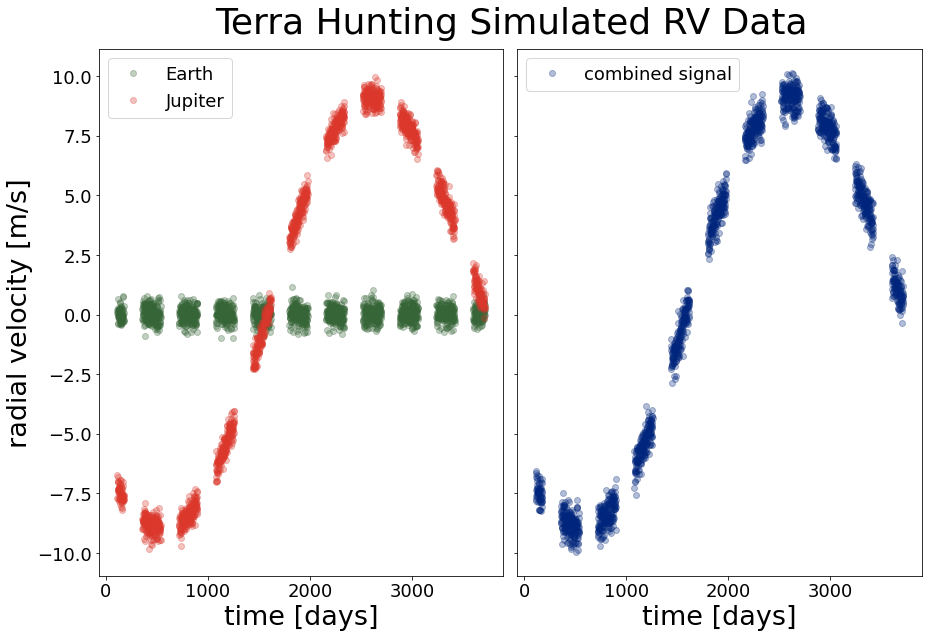

In [34]:
plot_rv(
    2, 
    rv_orbit, 
    rv_orbit_sum, 
    rv_sim, 
    rv_sim_sum, 
    times_rv, 
    times_observed_rv,
    ['#366537', '#db372b', '#00257c'],
    ['Earth', 'Jupiter'])



In [29]:
def plot_astrometry(
    n_planets, 
    ra_orbit, 
    ra_orbit_sum, 
    ra_sim, 
    ra_sim_sum, 
    dec_orbit, 
    dec_orbit_sum, 
    dec_sim, 
    dec_sim_sum,
    times_astrometry,
    times_observed_astrometry,
    colors,
    planet_names):
    
    
    
    # plot simulated orbit
    fig, ax = plt.subplots(1, 2, figsize = [18, 9], sharey = 'row')

    for ii in range(0, n_planets):
        ax[0].plot(ra_sim.T[ii], dec_sim.T[ii], 'o', 
                   color = colors[ii], label = planet_names[ii])

    ax[0].set_ylabel(r"$\Delta \delta$ ['']", fontsize = 27)
    ax[0].set_xlabel(r"$\Delta \alpha \cos \delta$ ['']", fontsize = 27)
    ax[0].invert_xaxis()
    ax[0].plot(0, 0, "k*")
    ax[0].set_aspect("equal", "datalim")
    
    ax[0].legend(loc=4, fontsize = 18)
    
    
    ax[1].plot(ra_sim_sum, dec_sim_sum, 'o', color = colors[n_planets], label = "combined signal")


    ax[1].set_xlabel(r"$\Delta \alpha \cos \delta$ ['']", fontsize = 27)
    ax[1].invert_xaxis()
    ax[1].plot(0, 0, "k*")
    ax[1].set_aspect("equal", "datalim")
    ax[1].legend(loc=4, fontsize = 18)
    
    ax[0].set_xlim(-0.0006, 0.0006)
    ax[0].set_ylim(-0.0006, 0.0006)
    
    ax[1].set_xlim(-0.0006, 0.0006)
    ax[1].set_ylim(-0.0006, 0.0006)
    
    fig.suptitle("Gaia + Roman Simulated Orbit Data", fontsize = 45, x=0.55)
    
    fig.tight_layout()
    fig.savefig('final_figures/astometry_raw_data.pdf')
    
    fig.show()
    
    
    
    #######
    #######
    #######



    
    
    
    
    

    fig, ax = plt.subplots(2, 2, figsize = [15,11], sharex='col', sharey='row')
    fig.suptitle("Gaia + Roman Simulated Astrometric Data", fontsize = 36, x= 0.55)
    ax0 = ax[0][0]
    ax1 = ax[1][0]
    ax2 = ax[0][1]
    ax3 = ax[1][1]
    
    if n_planets > 1:
        for ii in range(0, n_planets):
            ax0.plot(times_observed_astrometry, ra_sim.T[ii], 'o', color = colors[ii], label = planet_names[ii])
    else:
        ax0.plot(times_observed_astrometry, ra_sim, 'o', color = colors[0], label = planet_names[0])
    
    ax0.set_ylabel(r"$\Delta \alpha \cos \delta$ ['']", fontsize = 27)
    for tick in ax0.get_xticklabels():
        tick.set_rotation(30)
    ax0.legend(fontsize = 18, loc = 4)
    
    
    
    if n_planets > 1:
        for ii in range(0, n_planets):
            ax1.plot(times_observed_astrometry, dec_sim.T[ii], 'o', color = colors[ii], label = planet_names[ii])
    else:
        ax1.plot(times_observed_astrometry, dec_sim, 'o',  color = colors[0], label = planet_names[0])

    
    
    
    ax1.set_ylabel(r"$\Delta \delta$ ['']", fontsize = 27)
    ax1.set_xlabel("time [days]", fontsize = 27)
    ax1.legend(fontsize = 18, loc = 4)

    


    
    ax2.plot(times_observed_astrometry, ra_sim_sum, 'o', color = colors[n_planets], label = 'combined signal')
    for tick in ax3.get_xticklabels():
        tick.set_rotation(30)
    ax2.legend(fontsize = 18, loc = 4)
    
    ax3.plot(times_observed_astrometry, dec_sim_sum, 'o', color = colors[n_planets], label = 'combined signal')
    ax3.set_xlabel("time [days]", fontsize = 27)
    ax3.legend(fontsize = 18, loc = 4)


    ax1.set_ylim(-0.0006, 0.0006)  
    ax1.set_ylim(-0.0006, 0.0006)
    
    ax0.axvline(4700, ymin = 0, ymax = 1, color = 'k', ls = '--')
    ax0.text(4600, 0.0005, "Gaia", fontsize = 18, ha='right')
    ax0.text(4800, 0.0005, "Roman", fontsize = 18, ha='left')
    ax0.arrow(4600, 0.00045, -600, 0, width = 0.00001, 
              head_width= 0.00005, head_length = 100, color ='k')
    ax0.arrow(4800, 0.00045, 900, 0, width = 0.00001, 
              head_width= 0.00005, head_length = 100, color ='k')
    
    ax1.axvline(4700, ymin = 0, ymax = 1, color = 'k', ls = '--')
    ax1.text(4600, 0.0005, "Gaia", fontsize = 18, ha='right')
    ax1.text(4750, 0.0005, "Roman", fontsize = 18, ha='left')
    ax1.arrow(4600, 0.00045, -600, 0, width = 0.00001, 
              head_width= 0.00005, head_length = 100, color ='k')
    ax1.arrow(4800, 0.00045, 900, 0, width = 0.00001, 
              head_width= 0.00005, head_length = 100, color ='k')
    
    ax2.axvline(4700, ymin = 0, ymax = 1, color = 'k', ls = '--')
    ax2.text(4600, 0.0005, "Gaia", fontsize = 18, ha='right')
    ax2.text(4750, 0.0005, "Roman", fontsize = 18, ha='left')
    ax2.arrow(4600, 0.00045, -600, 0, width = 0.00001, 
              head_width= 0.00005, head_length = 100, color ='k')
    ax2.arrow(4800, 0.00045, 900, 0, width = 0.00001, 
              head_width= 0.00005, head_length = 100, color ='k')
    
    
    ax3.axvline(4700, ymin = 0, ymax = 1, color = 'k', ls = '--')
    ax3.text(4600, 0.0005, "Gaia", fontsize = 18, ha='right')
    ax3.text(4750, 0.0005, "Roman", fontsize = 18, ha='left')
    ax3.arrow(4600, 0.00045, -600, 0, width = 0.00001, 
              head_width= 0.00005, head_length = 100, color ='k')
    ax3.arrow(4800, 0.00045, 900, 0, width = 0.00001, 
              head_width= 0.00005, head_length = 100, color ='k')
    
    
    
    ax1.tick_params(axis='x', labelrotation=30)
    ax3.tick_params(axis='x', labelrotation=30)



    
    fig.tight_layout()
    fig.savefig('final_figures/astometry_ts_data.pdf')
    
    fig.show()




    
    
    return None

<ipython-input-29-ae3b3a67acb6>:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-29-ae3b3a67acb6>:164: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


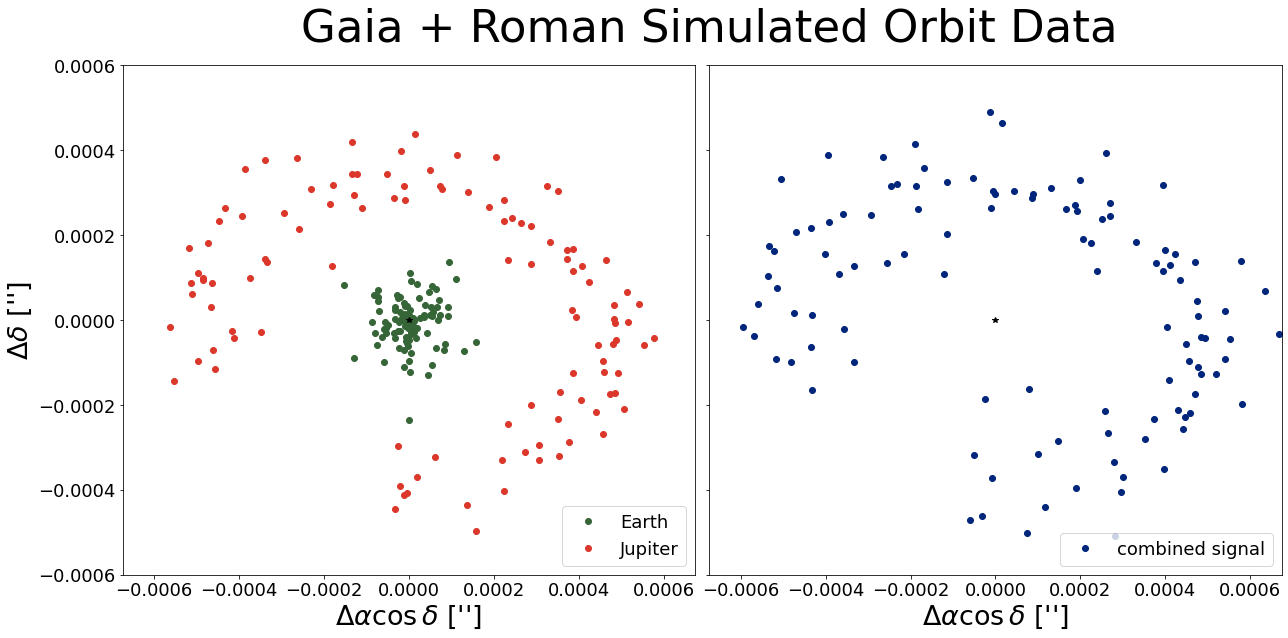

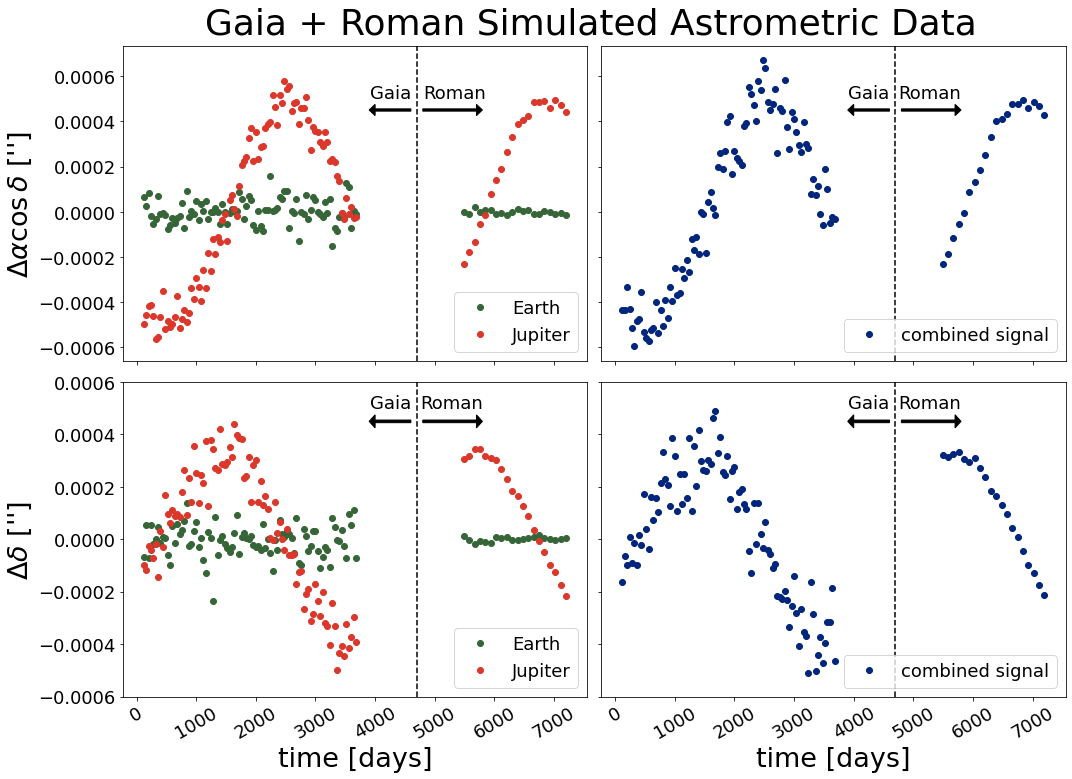

In [30]:
plot_astrometry(
    n_planets, 
    ra_orbit, 
    ra_orbit_sum, 
    ra_sim, 
    ra_sim_sum, 
    dec_orbit, 
    dec_orbit_sum, 
    dec_sim, 
    dec_sim_sum,
    times_astrometry,
    times_observed_astrometry,
    ['#366537', '#db372b', '#00257c'],
    ['Earth', 'Jupiter'])

In [7]:
import pickle

with open('./traces/Sep7/period4327_inc45_gaia60_roman5.pkl', 'rb') as buff:
    data = pickle.load(buff)  

model, trace = data['model'], data['trace']

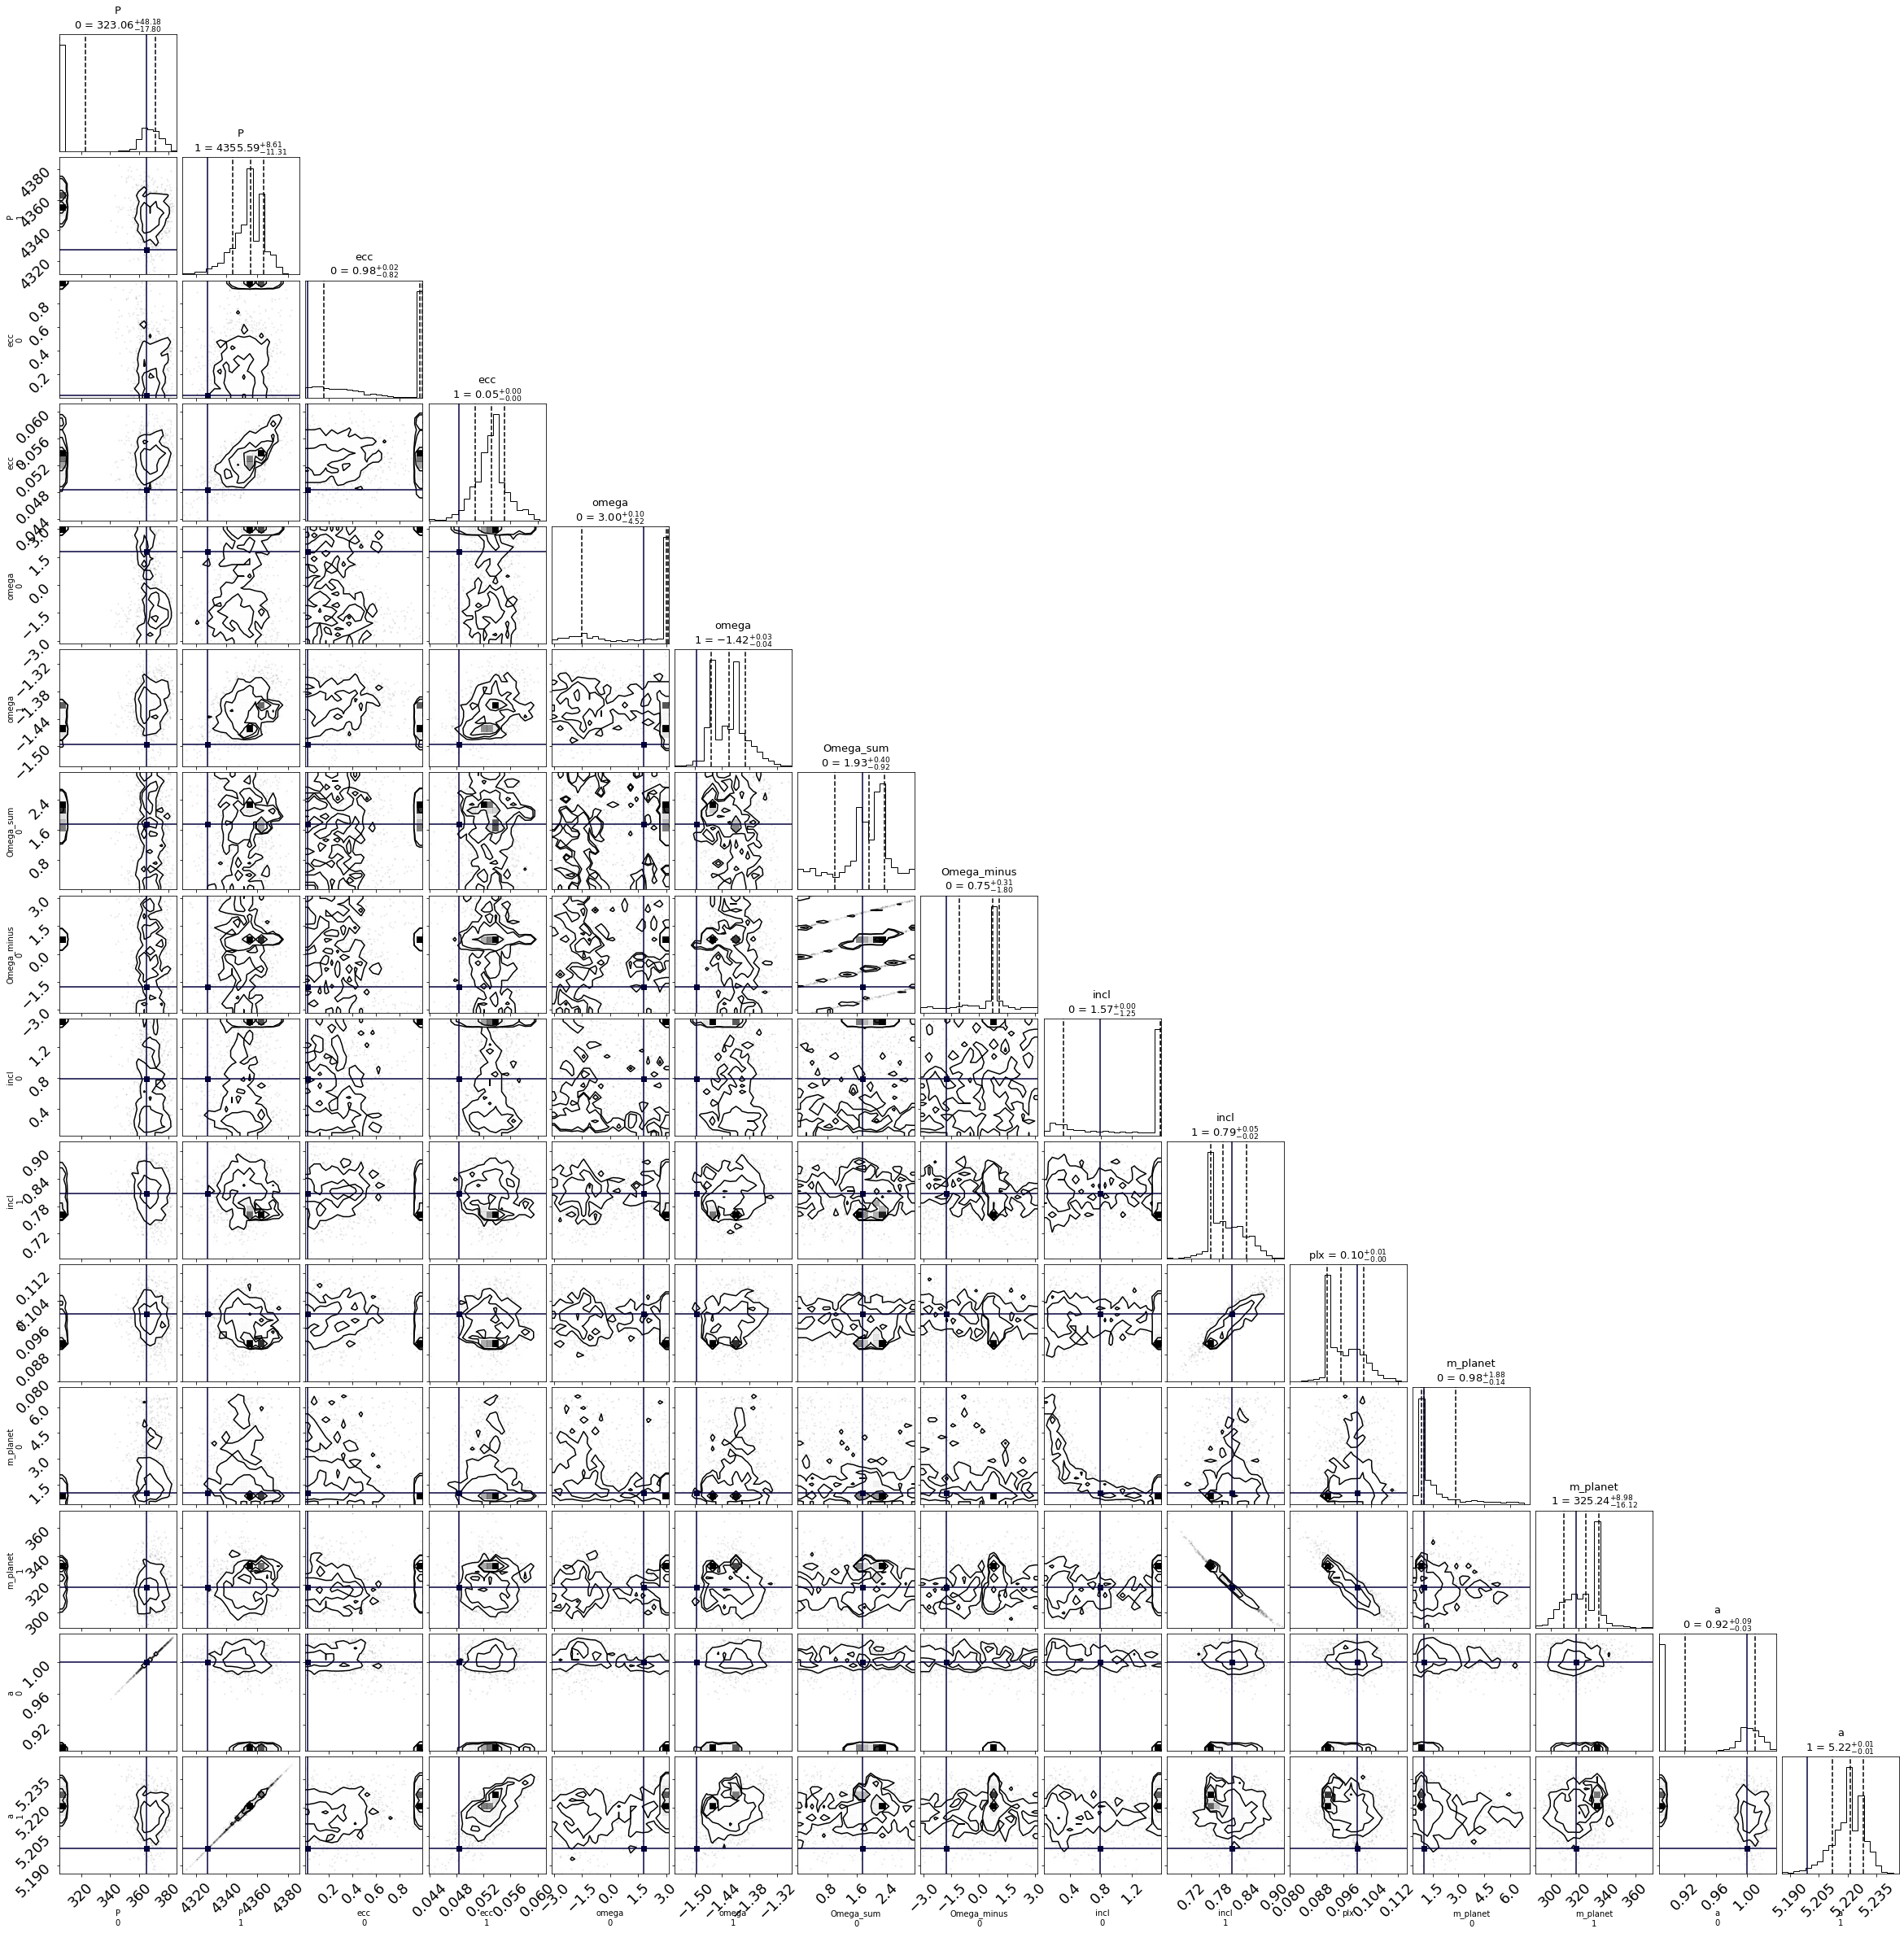

In [8]:
from model import a_from_Kepler3

a_true_earth = a_from_Kepler3(P_earth, 1.0+m_earth)
a_true_jup = a_from_Kepler3(P_jup, 1.0+m_jup)

truth_both = [P_earth, P_jup, e_earth, e_jup, omega_earth, omega_jup, Omega_earth+Omega_jup, Omega_earth-Omega_jup, 
              inclination_earth, inclination_jup, 0.1, m_earth*m_sun, m_jup*m_sun, a_true_earth, a_true_jup]


import corner

_ = corner.corner(
    trace, var_names=["P", "ecc", "omega", "Omega_sum", "Omega_minus", "incl", 
                      "plx", "m_planet", "a"], quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 13}, 
                       truths = truth_both, truth_color = "#03003a"
)

In [9]:
def sim_data(inc_earth, period_jup, roman_err):

	'''
	inc_earth = Earth inclination in degrees (Jupiter assumed 1.31 degrees greater than this value)
	period_jup = Jupiter period in days 
	roman_err = roman error in arcseconds, if None assumed no Roman observations
	'''




	##################
	##################
	##################
	##################
	#begin simulate data
	##################
	##################
	##################
	##################
	##################

	T_subtract = 2454000
	# orbital parameters from https://www.princeton.edu/~willman/planetary_systems/Sol/
	# BJD determined by converting values above using https://ssd.jpl.nasa.gov/tc.cgi#top

	P_earth = 365.256
	e_earth = 0.0167
	Tper_earth= 2454115.5208333 - T_subtract
	omega_earth = np.radians(102.9)
	Omega_earth = np.radians(0.0)
	inclination_earth = np.radians(inc_earth)
	m_earth = 1*3.00273e-6 #units m_sun



	P_jup = period_jup	
	e_jup = 0.0484
	Tper_jup = 2455633.7215278 - T_subtract
	omega_jup = np.radians(274.3) - 2*np.pi
	Omega_jup = np.radians(100.4)
	inclination_jup = np.radians(1.31) + inclination_earth
	m_jup = 317.83*3.00273e-6 #units m_sun


	m_sun = 333030 #earth masses


	#add gaia observing times
	times_observed_astrometry_gaia = []
	t_0 = int(Tper_earth)
	for ii in range(t_0, t_0+3600):
		if ii % 40 == 0:
			times_observed_astrometry_gaia.append(ii)

	
			
	#add THE observing times
	times_observed_rv = []
	t_0 = int(Tper_earth)
	add_data = True
	for ii in range(t_0, t_0+3600):
		
		if ii % 180 == 0:
			if add_data:
				add_data = False
			else:
				add_data = True
		   
		if add_data:
			times_observed_rv.append(ii)
			

	orbit_params_earth = [P_earth, e_earth, Tper_earth, omega_earth, Omega_earth, inclination_earth, m_earth]
	orbit_params_jup = [P_jup, e_jup, Tper_jup, omega_jup, Omega_jup, inclination_jup, m_jup]

	n_planets = 2
	orbit_params = [orbit_params_earth, orbit_params_jup]


	sigma_rv = 0.3

	sigma_ra_gaia = 6e-5
	sigma_dec_gaia = 6e-5
	parallax = 0.1 #as



	times, rv_results, ra_results, dec_results = simulate_data(
		n_planets, 
		sigma_rv, 
		sigma_ra_gaia,
		sigma_dec_gaia,
		parallax,
		orbit_params,
		times_observed_rv = times_observed_rv,
		times_observed_astrometry = times_observed_astrometry_gaia
		)


	[[times_rv, times_observed_rv, times_astrometry, times_observed_astrometry],
	[rv_orbit, rv_orbit_sum, rv_sim, rv_sim_sum],
	[ra_orbit, ra_orbit_sum, ra_sim, ra_sim_sum],
	[dec_orbit, dec_orbit_sum, dec_sim, dec_sim_sum]]  = times, rv_results, ra_results, dec_results

	ra_gaia_err = np.full(np.shape(ra_sim_sum), sigma_ra_gaia)
	dec_gaia_err = np.full(np.shape(dec_sim_sum), sigma_dec_gaia)


	#add roman observing times if roman_err not None
	if roman_err is not None:
		t_1 =  times_observed_astrometry_gaia[-1]+1800
		times_observed_astrometry_roman = []
		for ii in range(t_1, t_1+1800):
			if ii % 90 == 0:
				times_observed_astrometry_roman.append(ii)	


		sigma_ra_roman = roman_err
		sigma_dec_roman = roman_err



		times, rv_results, ra_results, dec_results = simulate_data(
			n_planets, 
			sigma_rv, 
			sigma_ra_roman,
			sigma_dec_roman,
			parallax,
			orbit_params,
			times_observed_rv = times_observed_rv,
			times_observed_astrometry = times_observed_astrometry_roman
			)

		times_astrometry = np.append(times_astrometry, times[2], axis=0)

		times_observed_astrometry = np.append(times_observed_astrometry, times[3], axis=0)

		ra_orbit = np.append(ra_orbit, ra_results[0], axis=0)
		ra_orbit_sum = np.append(ra_orbit_sum, ra_results[1], axis=0)
		ra_sim = np.append(ra_sim, ra_results[2], axis=0)
		ra_sim_sum = np.append(ra_sim_sum, ra_results[3], axis=0)

		dec_orbit = np.append(dec_orbit, dec_results[0], axis=0)
		dec_orbit_sum = np.append(dec_orbit_sum, dec_results[1], axis=0)
		dec_sim = np.append(dec_sim, dec_results[2], axis=0)
		dec_sim_sum = np.append(dec_sim_sum, dec_results[3], axis=0)

		ra_roman_err = np.full(np.shape(ra_results[3]), sigma_ra_roman)
		dec_roman_err = np.full(np.shape(dec_results[3]), sigma_dec_roman)


	
	##################
	##################
	##################
	##################
	#end simulate data
	##################
	##################
	##################
	##################
	##################



	##################
	##################
	##################
	##################
	#begin model data
	##################
	##################
	##################
	##################
	##################

	################
	################
	#rename variables in more consistent way for modeling
	x_rv = np.array(times_observed_rv)
	y_rv = rv_sim_sum
	y_rv_err = np.full(np.shape(y_rv), sigma_rv)

	x_astrometry = np.array(times_observed_astrometry)
	ra_data = ra_sim_sum
	dec_data = dec_sim_sum


	if roman_err is not None:
		ra_err = np.concatenate((ra_gaia_err, ra_roman_err))
		dec_err = np.concatenate((dec_gaia_err, dec_roman_err))

	else:
		ra_err = ra_gaia_err
		dec_err = dec_gaia_err



	# make a fine grid that spans the observation window for plotting purposes
	t_astrometry = np.linspace(x_astrometry.min() - 5, x_astrometry.max() + 5, 1000)
	t_rv = np.linspace(x_rv.min() - 5, x_rv.max() + 5, 1000)

	# for predicted orbits
	t_fine = np.linspace(x_astrometry.min() - 500, x_astrometry.max() + 500, num=1000)
    
    
	return x_rv, t_rv, y_rv, y_rv_err, x_astrometry, t_astrometry, t_fine, ra_data, dec_data, ra_err, dec_err

In [10]:
x_rv, t_rv, y_rv, y_rv_err, x_astrometry, t_astrometry, t_fine, ra_data, dec_data, ra_err, dec_err = sim_data(45., 4327.631, 10e-6)

<ipython-input-14-9d25f8dcdf80>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax[0].errorbar(x_astrometry, ra_data, yerr=tot_ra_err, **ekw,
<ipython-input-14-9d25f8dcdf80>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax[1].errorbar(x_astrometry, dec_data, yerr=tot_dec_err, **ekw,


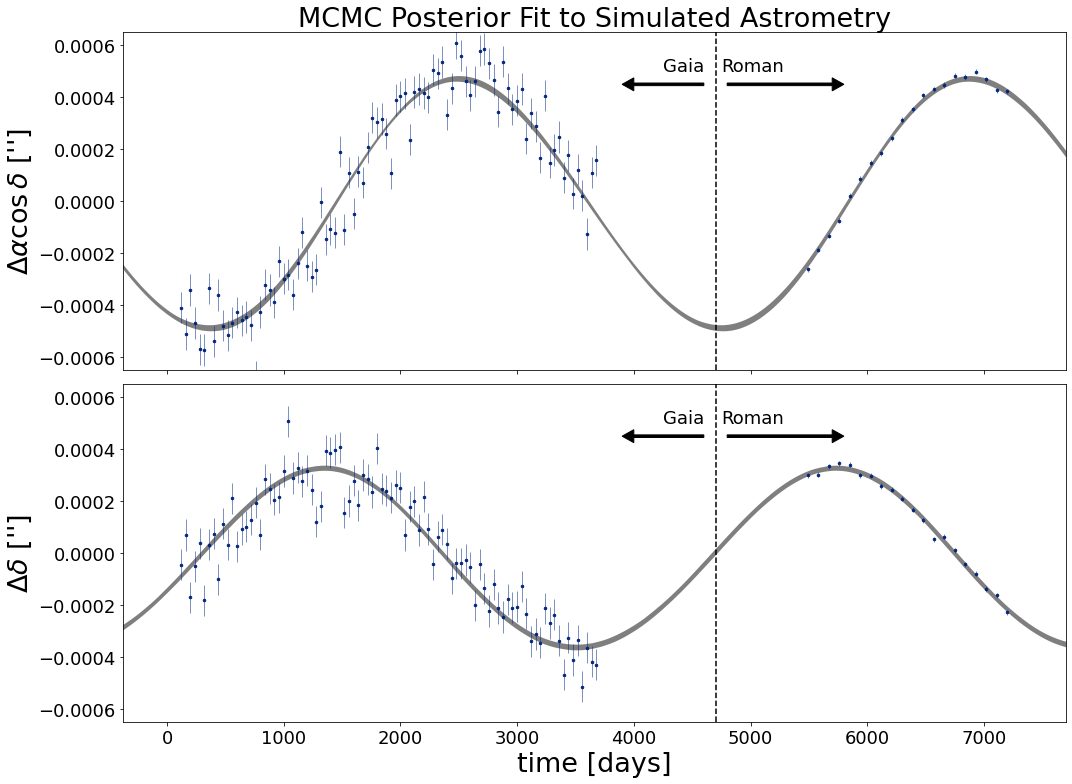

In [14]:
ekw = dict(fmt=".k", lw=0.5)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize = [15,11])
ax[0].set_ylabel(r"$\Delta \alpha \cos \delta$ ['']", fontsize = 27)
ax[1].set_ylabel(r"$\Delta \delta$ ['']", fontsize = 27)
ax[1].set_xlabel(r"time [days]", fontsize = 27)

tot_ra_err = ra_err 
tot_dec_err = dec_err

ax[0].errorbar(x_astrometry, ra_data, yerr=tot_ra_err, **ekw, 
               color = '#00257c', markersize=5)
q = np.percentile(trace.posterior["ra_model_fine"].values, [16, 84], axis=(0, 1))
ax[0].fill_between(t_fine, q[0], q[1], color="k", alpha=0.5, lw=.1)

ax[1].errorbar(x_astrometry, dec_data, yerr=tot_dec_err, **ekw, 
               color = '#00257c', markersize=5)
q = np.percentile(trace.posterior["dec_model_fine"].values, [16, 84], axis=(0, 1))
ax[1].fill_between(t_fine, q[0], q[1], color="k", alpha=0.5, lw=.1)

ax[-1].set_xlim(t_fine[0], t_fine[-1])
_ = ax[0].set_title("MCMC Posterior Fit to Simulated Astrometry", fontsize = 27)



ax[0].set_ylim(-0.00065, 0.00065)  
ax[1].set_ylim(-0.00065, 0.00065)

ax[0].axvline(4700, ymin = 0, ymax = 1, color = 'k', ls = '--')
ax[0].text(4600, 0.0005, "Gaia", fontsize = 18, ha='right')
ax[0].text(4750, 0.0005, "Roman", fontsize = 18, ha='left')
ax[0].arrow(4600, 0.00045, -600, 0, width = 0.00001, 
          head_width= 0.00005, head_length = 100, color ='k')
ax[0].arrow(4800, 0.00045, 900, 0, width = 0.00001, 
          head_width= 0.00005, head_length = 100, color ='k')

ax[1].axvline(4700, ymin = 0, ymax = 1, color = 'k', ls = '--')
ax[1].text(4600, 0.0005, "Gaia", fontsize = 18, ha='right')
ax[1].text(4750, 0.0005, "Roman", fontsize = 18, ha='left')
ax[1].arrow(4600, 0.00045, -600, 0, width = 0.00001, 
          head_width= 0.00005, head_length = 100, color ='k')
ax[1].arrow(4800, 0.00045, 900, 0, width = 0.00001, 
          head_width= 0.00005, head_length = 100, color ='k')

plt.tight_layout()
plt.savefig('final_figures/astometry_MCMC.pdf')

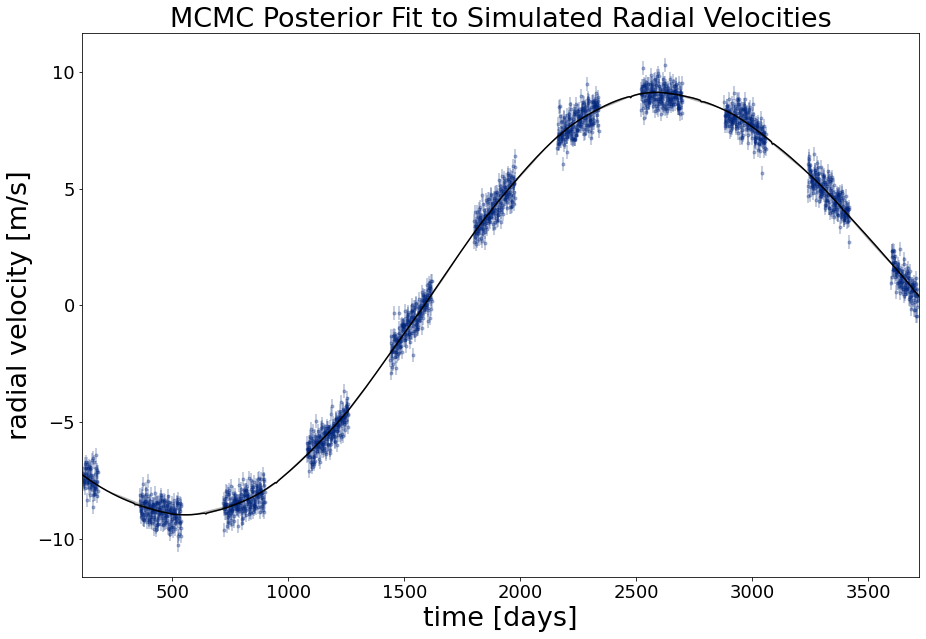

In [12]:
# Compute the posterior predictions for the RV model
rv_pred = trace.posterior["rv_model_pred"].values
pred = np.percentile(rv_pred, [16, 50, 84], axis=(0, 1))

fig, ax = plt.subplots(1, figsize = [15,10], sharey=True)

ax.errorbar(x_rv, y_rv, yerr=y_rv_err, color = "#00257c", marker='.', 
            alpha = 0.3, zorder = 0, ls = '')
ax.plot(t_rv, pred[1], color="k", label="model", zorder = 1)
art = ax.fill_between(t_rv, pred[0], pred[2], color="k", alpha=0.3)
art.set_edgecolor("none")

ax.set_xlim(t_rv.min(), t_rv.max())
ax.set_xlabel("time [days]", fontsize = 27)
ax.set_ylabel("radial velocity [m/s]", fontsize = 27)
ax.set_title("MCMC Posterior Fit to Simulated Radial Velocities", fontsize = 27)



plt.savefig('final_figures/rv_MCMC.pdf')